### FASE 1: EDA

In [ ]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Librerias para imputar nulos
# ------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [47]:
df_ans_dep = pd.read_csv("anxiety_depression_data.csv")
df_ans_dep.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,0,NaN,1,1,Frequent,8,9,5,7,7


In [48]:
def exploracion_df(data):
    print("Las primeras filas del dataset son:")
    print("--------------------------------------------------------")
    print(data.head())
    print("--------------------------------------------------------")
    print("Las columnas del dataset son:")
    print("--------------------------------------------------------")
    print(data.columns)
    print("--------------------------------------------------------")
    print("La forma del dataset es:")
    print("--------------------------------------------------------")
    print(data.shape)
    print("--------------------------------------------------------")
    print("La info de las columnas numéricas del dataset es:")
    print("--------------------------------------------------------")
    print(data.describe)
    print("--------------------------------------------------------")
    print("La info general del dataset es:")
    print("--------------------------------------------------------")
    print(data.info)

In [49]:
data = df_ans_dep

exploracion_df(data)

Las primeras filas del dataset son:
--------------------------------------------------------
   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  Family_History_Mental_Illness  \
0                 2             9                        

In [51]:
# Función para cambiar nombre a columnas y que sean homogeneas:

def renombrar_columnas(df):
    nuevas_columnas = {col: col.replace("_", " ") for col in df.columns}
    df.rename(columns=nuevas_columnas, inplace=True)
    return df

In [52]:
df_ans_dep = renombrar_columnas(df_ans_dep)
print(df_ans_dep.columns)  

Index(['Age', 'Gender', 'Education Level', 'Employment Status', 'Sleep Hours',
       'Physical Activity Hrs', 'Social Support Score', 'Anxiety Score',
       'Depression Score', 'Stress Level', 'Family History Mental Illness',
       'Chronic Illnesses', 'Medication Use', 'Therapy', 'Meditation',
       'Substance Use', 'Financial Stress', 'Work Stress', 'Self Esteem Score',
       'Life Satisfaction Score', 'Loneliness Score'],
      dtype='object')


In [ ]:
## Voy a revisar tipo de información que contiene cada columna:

# - "Family History Mental Illness" es int pero tiene más sentido que sea categórica ya que representa SI o NO
# - "Chronic Illnesses" es int pero tiene más sentido que sea categórica ya que representa SI o NO
# - "Therapy" es int pero tiene más sentido que sea categórica ya que representa SI o NO
# - "Meditation" es int pero tiene más sentido que sea categórica ya que representa SI o NO

In [54]:
def cambiar_tipo_columna(df, columns, new_type='object'):
    for col in columns:
        df[col] = df[col].astype(new_type)
    return df

In [55]:
columnas_a_cambiar = ['Family History Mental Illness', 'Chronic Illnesses', 'Therapy', 'Meditation']

df_ans_dep = cambiar_tipo_columna(df_ans_dep, columnas_a_cambiar)

In [56]:
# Compruebo valores en columnas tipo Object:

for col in df_ans_dep.select_dtypes(include='object'):
    print('----------------------------------------------')
    print('Para la columna:', col)
    print('-------------')
    print('Hay estos valores únicos:')
    print(df_ans_dep[col].unique())
    print('-------------')
    print('Esta es la frecuencia de cada valor único:')
    print(df_ans_dep[col].value_counts())

----------------------------------------------
Para la columna: Gender
-------------
Hay estos valores únicos:
['Male' 'Female' 'Non-Binary' 'Other']
-------------
Esta es la frecuencia de cada valor único:
Gender
Female        569
Male          520
Non-Binary     90
Other          21
Name: count, dtype: int64
----------------------------------------------
Para la columna: Education Level
-------------
Hay estos valores únicos:
["Bachelor's" "Master's" 'High School' 'Other' 'PhD']
-------------
Esta es la frecuencia de cada valor único:
Education Level
PhD            262
Master's       242
High School    242
Other          240
Bachelor's     214
Name: count, dtype: int64
----------------------------------------------
Para la columna: Employment Status
-------------
Hay estos valores únicos:
['Unemployed' 'Retired' 'Employed' 'Student']
-------------
Esta es la frecuencia de cada valor único:
Employment Status
Employed      320
Student       310
Unemployed    288
Retired       282
Name:

In [57]:
# Compruebo valores en columnas tipo Int:

for col in df_ans_dep.select_dtypes(include='int'):
    print('----------------------------------------------')
    print('Para la columna:', col)
    print('-------------')
    print('Hay estos valores únicos:')
    print(df_ans_dep[col].unique())
    print('-------------')
    print('Esta es la frecuencia de cada valor único:')
    print(df_ans_dep[col].value_counts())

----------------------------------------------
Para la columna: Age
-------------
Hay estos valores únicos:
[56 69 46 32 60 25 38 36 40 28 41 70 53 57 20 39 19 61 47 55 50 29 42 66
 44 59 45 33 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34 23 71 51 27 48
 65 62 58 18 22 30 49 73 63]
-------------
Esta es la frecuencia de cada valor único:
Age
43    32
45    30
50    28
52    28
66    28
64    26
54    26
68    26
49    25
62    25
56    25
41    25
70    24
22    24
71    24
18    24
42    24
25    23
40    23
20    23
19    23
72    22
69    22
65    22
53    22
74    22
61    22
23    22
34    22
39    22
33    21
29    21
47    21
36    20
38    19
28    19
21    19
46    19
58    18
32    18
51    18
26    18
31    18
59    17
30    17
57    17
73    17
37    16
67    16
27    16
48    16
35    16
44    16
55    15
24    14
63    13
60    11
Name: count, dtype: int64
----------------------------------------------
Para la columna: Social Support Score
-------------
Hay estos valores 

In [58]:
# Compruebo valores en columnas tipo Float:

for col in df_ans_dep.select_dtypes(include='float'):
    print('----------------------------------------------')
    print('Para la columna:', col)
    print('-------------')
    print('Hay estos valores únicos:')
    print(df_ans_dep[col].unique())
    print('-------------')
    print('Esta es la frecuencia de cada valor único:')
    print(df_ans_dep[col].value_counts())

----------------------------------------------
Para la columna: Sleep Hours
-------------
Hay estos valores únicos:
[ 6.   8.8  5.3  7.2  4.4  7.1  3.3  7.4  7.8  5.6  6.7  9.4  5.7  4.9
  8.7  6.5  8.   8.5  5.4  5.8  8.3  9.   7.3  5.2  9.5  7.   6.6  2.7
  6.1  6.9  4.8  6.2  9.1  8.9  6.3  6.4  6.8  7.7  4.2  5.5  4.7  4.6
  5.9  5.1  3.8 10.5  5.   7.9  9.2  3.6  8.4  3.9  9.8  7.5  3.4  3.1
  2.4  8.6 12.4  7.6  9.3  4.   2.   4.1  8.2 10.1  4.5  8.1  2.3  3.7
  2.8  3.5  2.1  4.3  9.9 10.8  9.6 10.   9.7  2.6  3.2 10.3 10.2 11.4
  3. ]
-------------
Esta es la frecuencia de cada valor único:
Sleep Hours
6.8     41
7.2     40
6.4     40
5.9     36
5.7     34
        ..
2.3      1
10.1     1
2.0      1
3.1      1
3.0      1
Name: count, Length: 85, dtype: int64
----------------------------------------------
Para la columna: Physical Activity Hrs
-------------
Hay estos valores únicos:
[ 0.4  2.8  1.6  0.5  0.7  1.3  6.8  2.5  6.3  1.1  4.6  1.5  0.6  1.2
  0.3  0.   0.1  7.6  2.2 

In [ ]:
## Hay nulos en dos columnas ('Medication_Use' y 'Substance_Use'), alto porcentaje

In [60]:
def identificar_nulos(df):
    print("\nValores nulos por columna:\n")
    print(df.isnull().sum())

In [61]:
df = df_ans_dep

identificar_nulos(df)


Valores nulos por columna:

Age                                0
Gender                             0
Education Level                    0
Employment Status                  0
Sleep Hours                        0
Physical Activity Hrs              0
Social Support Score               0
Anxiety Score                      0
Depression Score                   0
Stress Level                       0
Family History Mental Illness      0
Chronic Illnesses                  0
Medication Use                   747
Therapy                            0
Meditation                         0
Substance Use                    834
Financial Stress                   0
Work Stress                        0
Self Esteem Score                  0
Life Satisfaction Score            0
Loneliness Score                   0
dtype: int64


In [62]:
def porcentaje_nulos(df):
    nulos = df.isnull().sum()/df.shape[0]*100
    nulos.sort_values(ascending=False)
    nulos = nulos[nulos > 0]
    nulos.sort_values(ascending=False)
    nulos = nulos.to_frame(name='perc_nulos').reset_index().rename(columns={'index': 'var'})
    return nulos

In [63]:
df = df_ans_dep

nulos = porcentaje_nulos(df)
print(nulos)

              var  perc_nulos
0  Medication Use       62.25
1   Substance Use       69.50


In [64]:
## Tenemos dos columnas con nulos con un porcentaje muy alto y las dos son categóricas:

# 1. Quiero ver los datos del df de las variables categóricas con nulos
columnas_objeto = df_ans_dep.select_dtypes(include=['object']).columns
columnas_nulos = nulos['var'].to_list()
columnas_comunes_objeto_nulos = columnas_objeto.intersection(columnas_nulos)
columnas_comunes_objeto_nulos 

# 2. # Miramos la proporción de valores entre cada categoría de las variables categóricas.
for col in columnas_comunes_objeto_nulos:
    print(f"La distribución de las categorías para la columna", col)
    display(df_ans_dep[col].value_counts() / df_ans_dep.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna Medication Use


Medication Use
Regular       0.198333
Occasional    0.179167
Name: count, dtype: float64

........................
La distribución de las categorías para la columna Substance Use


Substance Use
Occasional    0.201667
Frequent      0.103333
Name: count, dtype: float64

........................


In [ ]:
# En "Medication Use" no hay categoría dominante --> como tengo muchos datos faltantes, voy a imputar con nueva categoria ("Unknown")
# En "Substance Use"la diferencia entre categorías no es tan grande por lo que no hya una claramente dominante, la imputación 
# con "Desconocido" podría ser una opción apropiada

In [ ]:
# Elimino nulos en 'Medication Use'

df_ans_dep['Medication Use'] = df_ans_dep['Medication Use'].fillna('Unknown')

print(df_ans_dep['Medication Use'].value_counts())

Medication Use
Unknown       747
Regular       238
Occasional    215
Name: count, dtype: int64


In [ ]:
# Elimino nulos en 'Substance Use':

# Imputar con la categoría 'Desconocido'
df_ans_dep['Substance Use'] = df_ans_dep['Substance Use'].fillna('Unknown')

print(df_ans_dep['Substance Use'].value_counts())


Substance Use
Unknown       834
Occasional    242
Frequent      124
Name: count, dtype: int64


In [ ]:
# Compruebo que no hay nulos

df_ans_dep.isnull().sum()

Age                              0
Gender                           0
Education Level                  0
Employment Status                0
Sleep Hours                      0
Physical Activity Hrs            0
Social Support Score             0
Anxiety Score                    0
Depression Score                 0
Stress Level                     0
Family History Mental Illness    0
Chronic Illnesses                0
Medication Use                   0
Therapy                          0
Meditation                       0
Substance Use                    0
Financial Stress                 0
Work Stress                      0
Self Esteem Score                0
Life Satisfaction Score          0
Loneliness Score                 0
dtype: int64

In [ ]:
## Compruebo que no hay duplicados

df_ans_dep.duplicated().sum()

0

### FASE 2: VISUALIZACION 

Cuestiones interesantes a visualizar de cara al análisis:

- como se distribuye la edad --> histograma
- como se distribuye el género --> pie-chart
- como se distribuye el sueño --> histograma
- como se disfrituye situacion laboral --> countplot
- relacion entre "Anxiety Score" y "Gender" --> Barplot o boxplot (numérica y categórica)
- relacion entre "Anxiety Score" y "Age" --> Scatterplot o coeficiente correlacion (dos numéricas)
- posible relacion entre edad y ansiedad, estres y depresion --> correlación
- relacion entre "Depression Score" y "Gender" --> Barplot o boxplot (numérica y categórica)
- relacion entre "Depression Score" y "Age" --> Scatterplot o coeficiente correlacion (dos numéricas)
- cuantos van a Terapia --> Countplot o pie chart
- cuantos usan medicacion --> Countplot o pie chart
- como se distribuye "Life Satisfaction Score" --> Histograma o boxplot (si la dejo como numérica)
- como se distribuye "Loneliness Score" --> Histograma o boxplot (si la dejo como numérica)
- ver si hay relación entre "Life Satisfaction Score" y "Loneliness Score" --> correlación

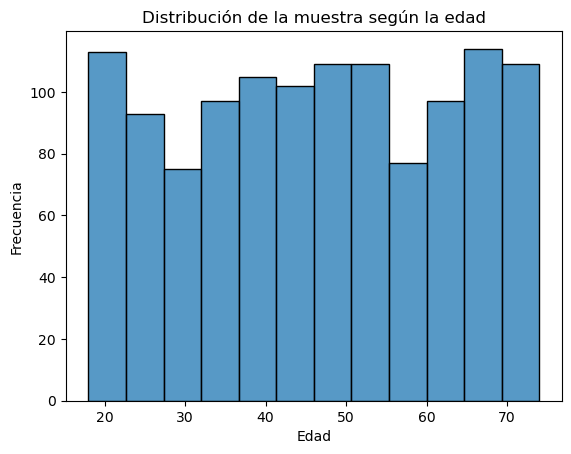

In [88]:
# Como se distribuye la edad

sns.histplot(data=df_ans_dep, x='Age', multiple="stack", palette="viridis")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title('Distribución de la muestra según la edad')
plt.show()

**Interpretacion**: la distribución de la edad en la muestra es relativamente homogénea, con una representación equilibrada de los diferentes rangos de edad. Tenemos perfiles desde los 18 hasta los 74, siendo la media de edad 46 años. 

Sin embargo, investigaciones previas han mostrado que los trastornos de ansiedad y depresión tienden a ser más prevalentes en personas jóvenes y adultas, lo que podría indicar una mayor vulnerabilidad de estos grupos a factores estresantes en el contexto actual. Sería interesante explorar esto más en detalle y ver como se relacion la edad con esas variables

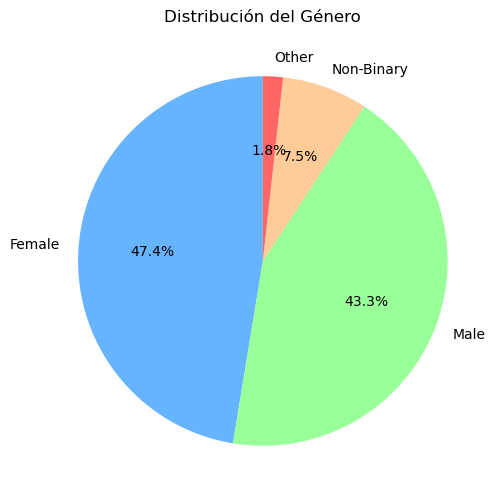

In [89]:
# Como se dstribuye el género

gender_counts = df_ans_dep['Gender'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Distribución del Género')
plt.ylabel('')
plt.show()

**Interpretación**: la distribución de género en la muestra es bastante equilibrada, con una ligera mayoría de mujeres (47.4%) y una representación casi equivalente de hombres (43.3%). Además, se incluye un 7,5% de personas no binarias y un 1,8% de otras identidades de género. Esta diversidad en la muestra permite una análisis más inclusivo de cómo la ansiedad y la depresión pueden afectar a personas de diferentes géneros.

Este equilibrio es importante porque garantiza que los resultados no estén sesgados hacia un solo género. El hecho de incluir una proporción significativa de personas no binarias y otras identidades de género también hace que el análisis sea más representativo de las experiencias de todos los géneros.

En la literatura científica, se ha documentado que las mujeres tienen una mayor prevalencia de trastornos de ansiedad y depresión en comparación con los hombres, lo que podría reflejarse en los resultados de este estudio. Sin embargo, es importante analizar si las experiencias de las personas no binarias y otras identidades de género también reflejan patrones similares o diferentes. La inclusión de estos grupos podría ofrecer una visión más completa de cómo la ansiedad y la depresión afectan a personas fuera del binomio tradicional de género.

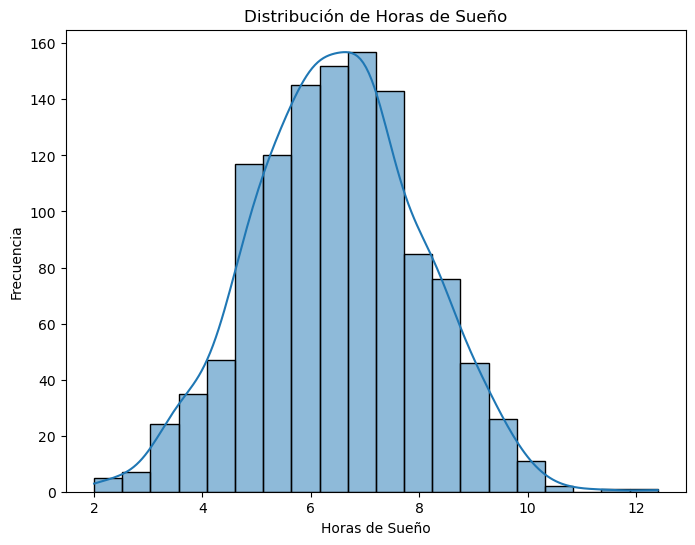

In [73]:
# como se distribuye las horas de sueño

plt.figure(figsize=(8, 6))
sns.histplot(df_ans_dep['Sleep Hours'], bins=20, kde=True)
plt.title('Distribución de Horas de Sueño')
plt.xlabel('Horas de Sueño')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación**: La distribución de las horas de sueño sigue una tendencia normal, con la mayoría de los sujetos durmiendo entre 6 y 8 horas. Se observa una menor frecuencia en los extremos (2-4h y 10-12h), lo que sugiere que los patrones de sueño más comunes se concentran en este rango intermedio.

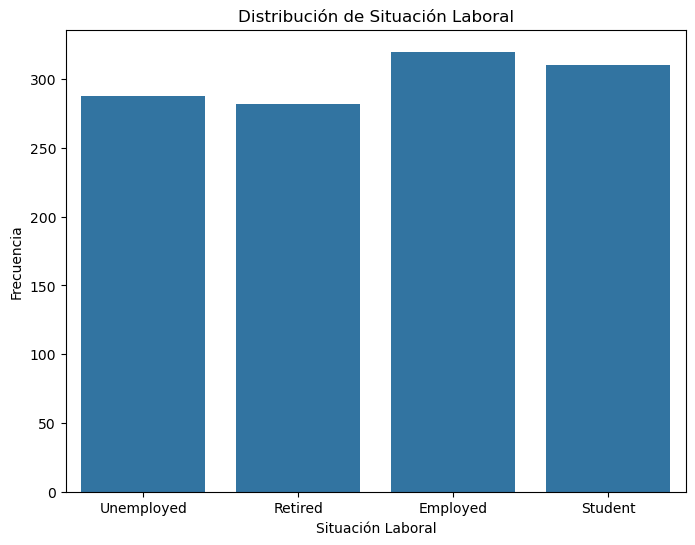

In [90]:
# como se distribuye situacion laboral

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment Status')
plt.title('Distribución de Situación Laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación**: La distribución de la situación laboral es bastante homogénea, con una representación equilibrada de los distintos grupos: estudiantes, desempleados, activos y jubilados. Esto sugiere una diversidad en el perfil laboral de los sujetos analizados.

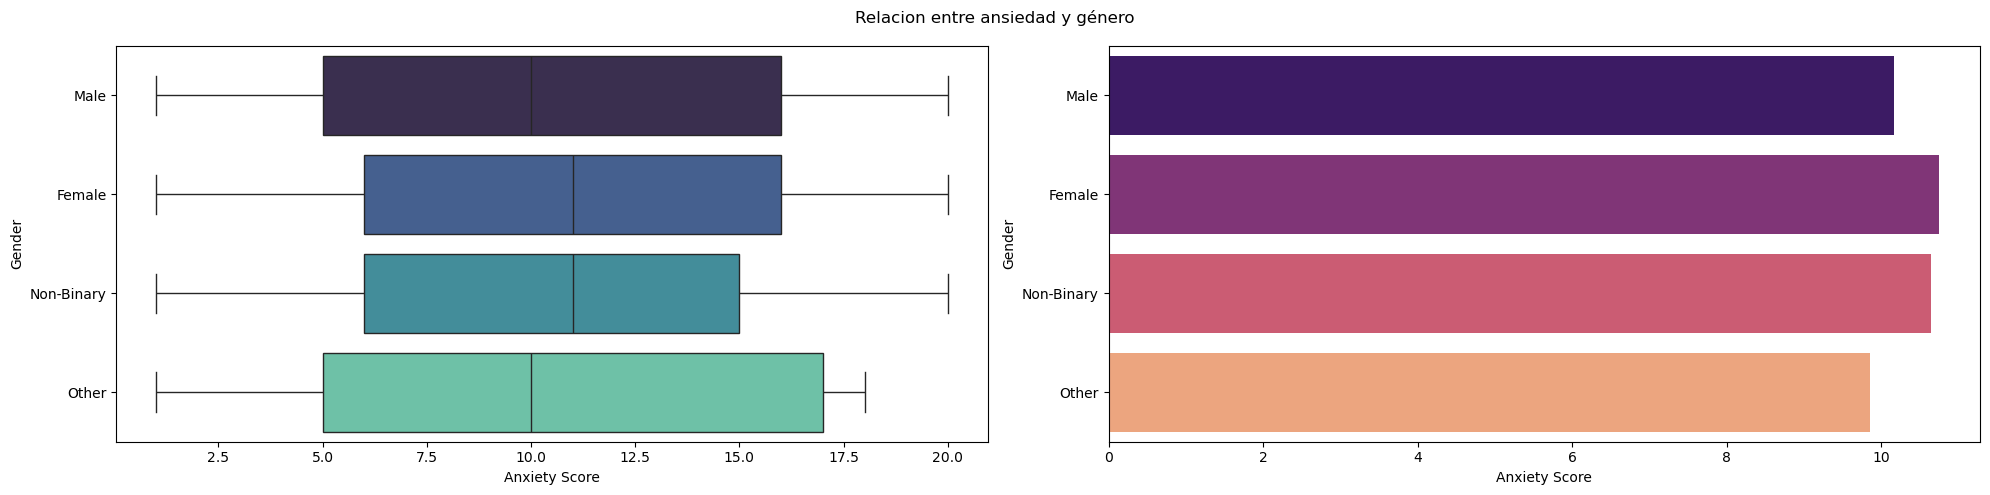

In [91]:
# relacion entre "Anxiety Score" y "Gender" 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.boxplot(x = "Anxiety Score", 
            y = "Gender", 
            data = df_ans_dep, 
            ax = axes[0], 
            palette= "mako")


# creamos nuestro primer barplot. 📌 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCIÓN DEL ESTADO CIVIL
sns.barplot(x = "Anxiety Score", 
            y = "Gender", 
            data = df_ans_dep,
            ci = None,
            ax = axes[1], 
            palette = "magma")

plt.suptitle("Relacion entre ansiedad y género")

# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

**Interpretación**: 
- En el gráfico de la izquierda (boxplot) se muestra la distribución de la variable *Ansiedad* en cada uno de los cuatro grupos según el género. Observamos que la distribución en todos los grupos es bastante similar, aunque el rango de puntuaciones en 'hombres' y en 'no binarios' es algo más amplio. Además la mediana también es más baja en estos grupos, podría indicar que la mayoría de los individuos en estos grupos reportan niveles de ansiedad más bajos, pero es esencial profundizar en el análisis para comprender si este patrón se mantiene en todos los grupos y qué factores podrían influir en estos resultados. Además, convendría investigar si la diferencia observada es estadísticamente significativa.

- En la gráfica de la derecha (barplot) se muestra la puntuación media de ansiedad para cada grupo. Las puntuaciones son bastante similares entre los cuatro grupos, siendo ligeramente más altas en mujeres y personas no binarias. Sin embargo, la diferencia con los otros grupos parece mínima, por lo que sería necesario realizar un análisis estadístico para determinar si es significativa.

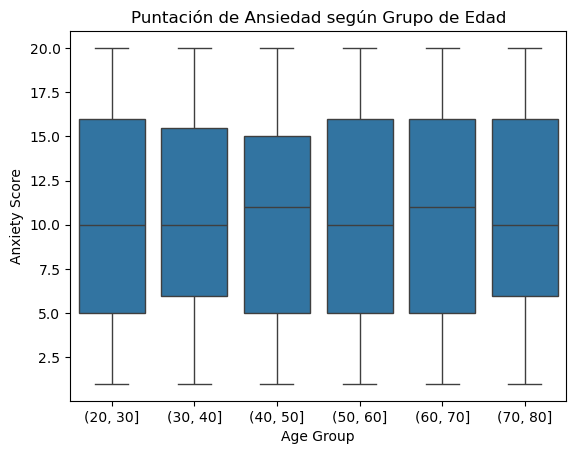

In [92]:
# Relacion entre ansiedad y edad
df_ans_dep['Age Group'] = pd.cut(df_ans_dep['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

sns.boxplot(x='Age Group', y='Anxiety Score', data=df_ans_dep)
plt.title('Puntación de Ansiedad según Grupo de Edad')
plt.show()

**Interpretación**: al agrupar por rangos de edad de 10 años, vemos que la distribución es bastante pareja en cuanto a la puntuación en *Ansiedad*, siendo además la mediana de los distintos grupos muy parecida. 

La distribución de la puntuación en *Ansiedad* es bastante uniforme en todos los rangos de edad, con medianaas similares en cada grupo, lo que sugiere que la ansiedad no está fuertemente influenciada por la edad en esta muestra. Esto podría indicar que los niveles de ansiedad son consistentes a través de diferentes etapas de la vida, aunque sería útil explorar si otros factores (como género, situación laboral o factores sociales) podrían estar influyendo en estos resultados

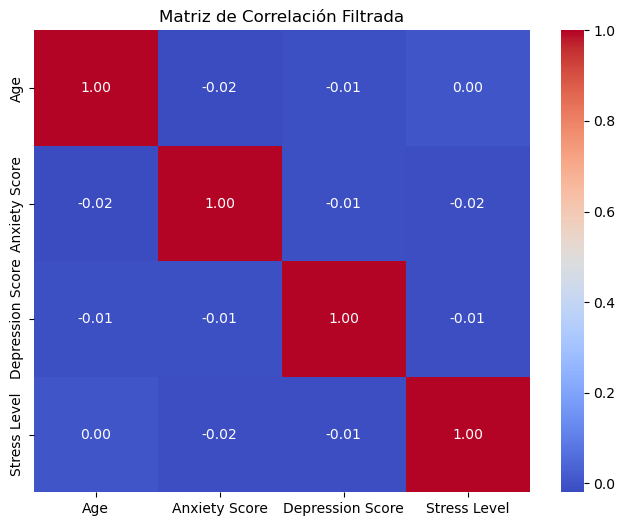

In [ ]:
# Correlacion entre medidas numéricas
cols = ['Age', 'Anxiety Score', 'Depression Score', 'Stress Level'] 

correlation_matrix = df_ans_dep[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación Filtrada')
plt.show()

**Interpretación**: en la matriz de correlación, la puntuación más alta observada es -0.02, lo que indica que no existen relaciones fuertes entre las variables 'Edad', 'Puntuación de Ansiedad', 'Puntuación de Depresión' y 'Nivel de Estrés'. Esto sugiere que, en este conjunto de datos, las variables analizadas están débilmente correlacionadas entre sí, lo que implica que no hay una asociación clara o significativa entre ellas.

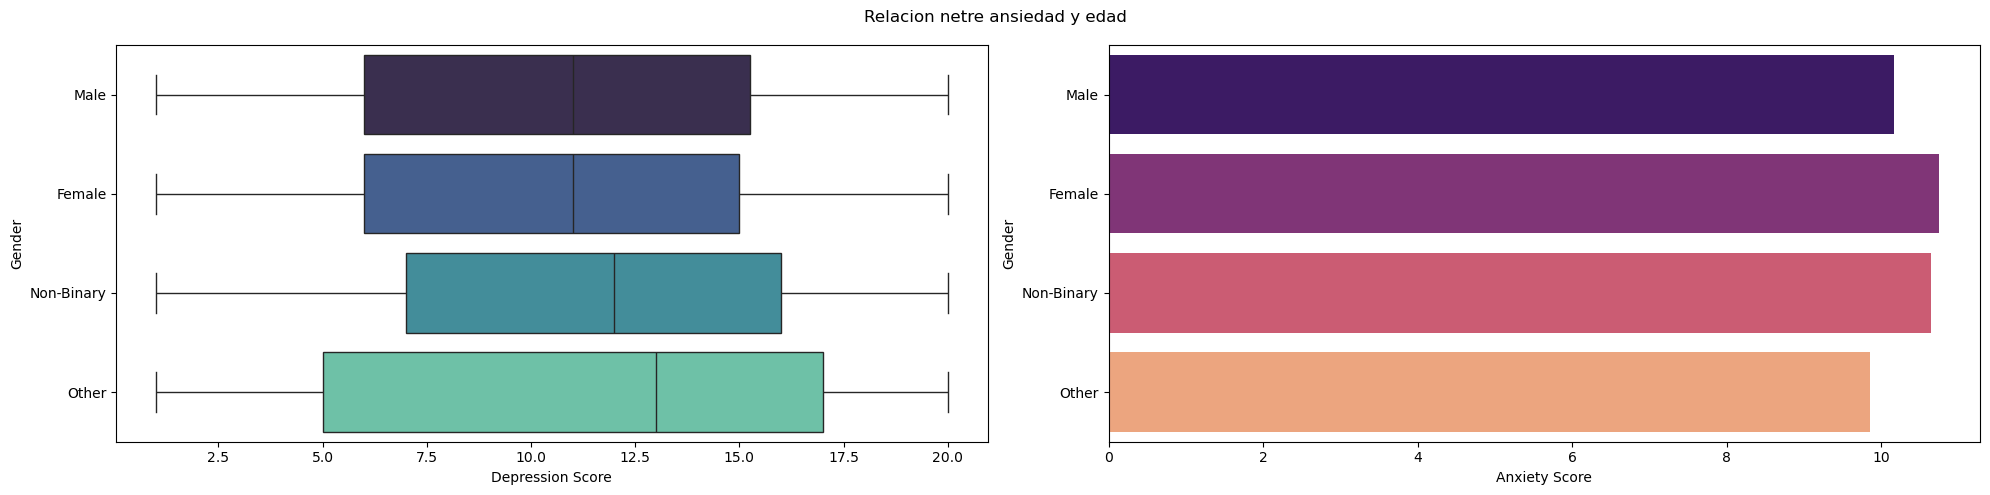

In [ ]:
# Relacion entre "Depression Score" y "Gender"

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.boxplot(x = "Depression Score", 
            y = "Gender", 
            data = df_ans_dep, 
            ax = axes[0], 
            palette= "mako")

sns.barplot(x = "Anxiety Score", 
            y = "Gender", 
            data = df_ans_dep,
            ci = None,
            ax = axes[1], 
            palette = "magma")

plt.suptitle("Relacion entre ansiedad y edad")
plt.tight_layout()

**Interpretación**: 
- en el gráfico de la izquierda (boxplot) podemos ver que la mediana de las puntuaciones de depresión es ligeramente más alta en los grupos 'no binarios' y 'otros géneros' en comparación con hombres y mujeres, lo que indica que, en el 50% central de los datos, los niveles de depresión son un poco más elevados en estos dos grupos.

- en la gráfica de la izquierda (barplot), la media muestra una tendencia similar, con puntuaciones ligeramente más altas en 'mujeres' y 'no binarios'.

Analizando por grupos resaltar:
- 'grupo no binario': la diferencia entre la media y la mediana sugiere que la distribución de las puntuaciones está sesgada hacia la baja. Esto significa que existen algunos individuos con puntuaciones de depresión significativamente más bajas que están reduciendo la media, pero la mayoría de las personas en este grupo tienen puntuaciones más altas (porque la mediana es más alta).
Aunque algunos individuos reportan puntuaciones bajas de depresión, la mayoría tienen puntuaciones más altas, y la mediana refleja mejor el valor típico del grupo.

- 'grupo otros géneros': la mediana es mayor que la media, lo que indica que la distribución está sesgada hacia los valores altos. Es decir, algunos individuos tienen puntuaciones de depresión muy bajas, lo que arrastra la media hacia abajo, pero la mayoría de las personas en este grupo tiene puntuaciones de depresión más altas, lo que hace que la mediana sea más alta.
Conclusión: Aunque algunos individuos con puntuaciones bajas están afectando la media, el valor central (mediana) refleja que, en general, la mayoría de las personas en este grupo reportan puntuaciones de depresión más altas.

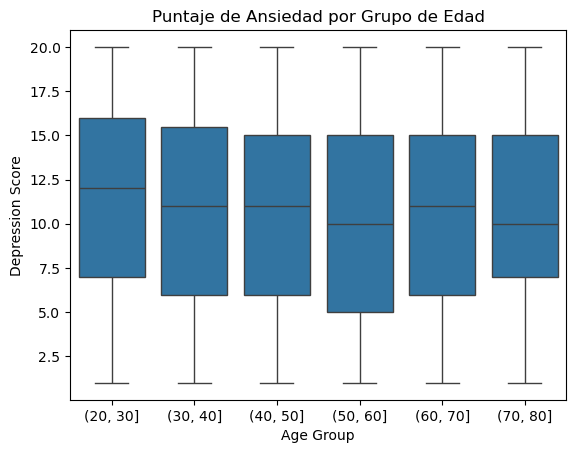

In [79]:
## relacion entre "Depression Score" y "Age"

df_ans_dep['Age Group'] = pd.cut(df_ans_dep['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

sns.boxplot(x='Age Group', y='Depression Score', data=df_ans_dep)
plt.title('Puntaje de Ansiedad por Grupo de Edad')
plt.show()

**Interpretación**: al agrupar por rangos de edad de 10 años, vemos que la distribución es bastante pareja en cuanto a la puntuación en *Depresión*, siendo además la mediana de los distintos grupos bastante parecida. 

La distribución de la puntuación en *Depresión* es bastante uniforme en todos los rangos de edad, con medianaas similares en cada grupo, lo que sugiere que la depresión no está fuertemente influenciada por la edad en esta muestra. Esto podría indicar que los niveles de depresión son consistentes a través de diferentes etapas de la vida, aunque sería útil explorar si otros factores (como género, situación laboral o factores sociales) podrían estar influyendo en estos resultados.

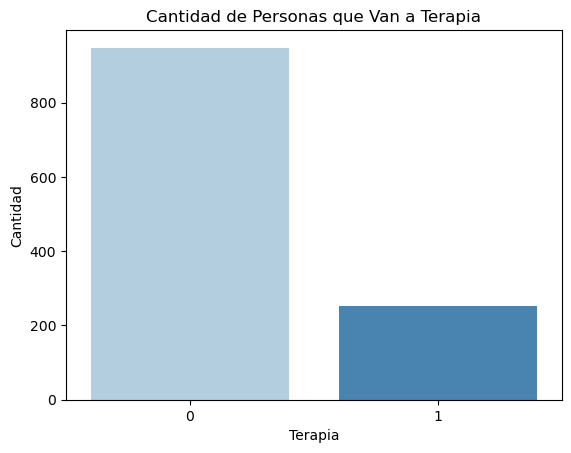

In [80]:
## Análisis de cuantos de los individuos analizados van a terapia

sns.countplot(data = df_ans_dep, x = 'Therapy', palette = 'Blues')

# Personalizar el gráfico
plt.title('Cantidad de Personas que Van a Terapia')
plt.xlabel('Terapia')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

**Interpretacion**: en cuanto a la asistencia a terapia, la mayoría de las personas no asisten (valor 0), mientras que un número significativamente menor asiste regularmente (valor 1). Esto sugiere que, en la muestra analizada, la mayoría no está recibiendo apoyo terapéutico, mientras que solo una pequeña proporción lo hace.

Convendría analizar esto más en detalle, para ver si hay diferencias por ejemplo en los nivels de estrés, ansiedad y depresión en función de si van a terapia o no.

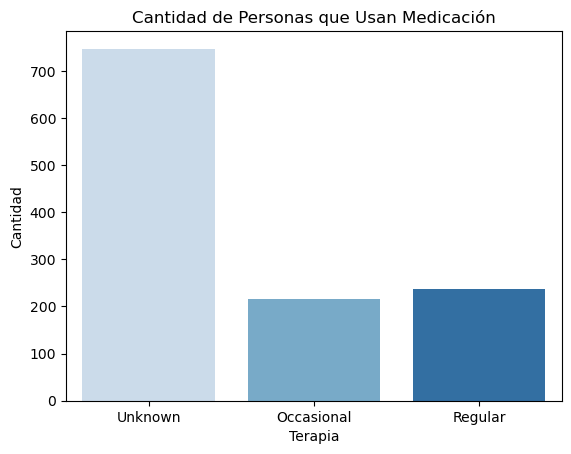

In [81]:
## Análisis de cuantos de los individuos analizados usan medicación

sns.countplot(data = df_ans_dep, x = 'Medication Use', palette = 'Blues')

# Personalizar el gráfico
plt.title('Cantidad de Personas que Usan Medicación')
plt.xlabel('Terapia')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

**Interpretación**: hay que recordar que aquí teníamos casi un 60% de valores nulos, lo que ahora se refleja como "Unknown". Del resto de valores vemos, que la proporción de uso de medicación se divide de forma bastante pareja entre los grupos que la usan de manera ocasional y los que la usan de manera regular. 

Convendría explorar esto más en detalle, saber por qué tenemos tantos datos faltantes y tenerlo muy en cuenta de cara a sacar conlusiones. 

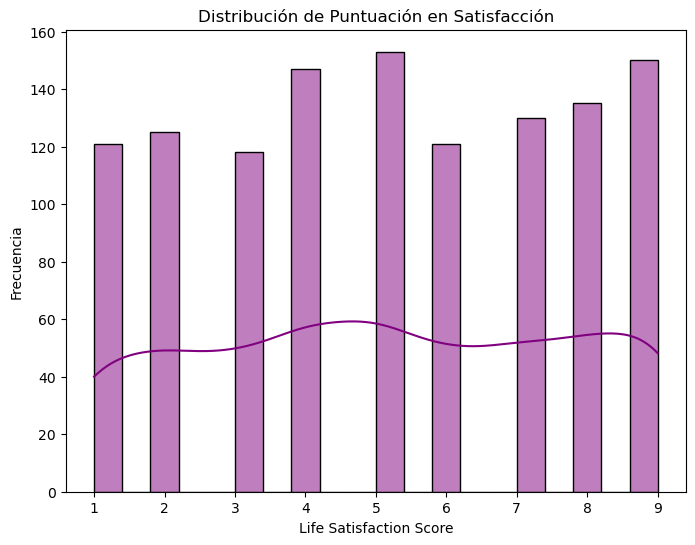

In [98]:
# Crear un histograma para la distribución de Life Satisfaction Score
plt.figure(figsize=(8, 6))
sns.histplot(df_ans_dep['Life Satisfaction Score'], kde=True, color='purple', bins=20)  # Agrega kde para la curva de densidad
plt.title('Distribución de Puntuación en Satisfacción')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('Frecuencia')
plt.show()

**Interpretacion**: El histograma de satisfacción muestra una distribución bastante uniforme a lo largo de las 9 posibles puntuaciones (de 1 a 9), lo que sugiere que los niveles de satisfacción en la muestra son diversos y no se inclinan hacia una puntuación específica. Esto indica que los participantes tienen opiniones variadas, sin una tendencia clara hacia una puntuación más alta o baja.

Sería relevante estudiar si otras variables (como edad, género, situación laboral así como estrés, ansiedad y depresión) influyen en que la puntuación general sea más alta o baja, ya que estas podrían tener un impacto en los niveles de satisfacción reportados

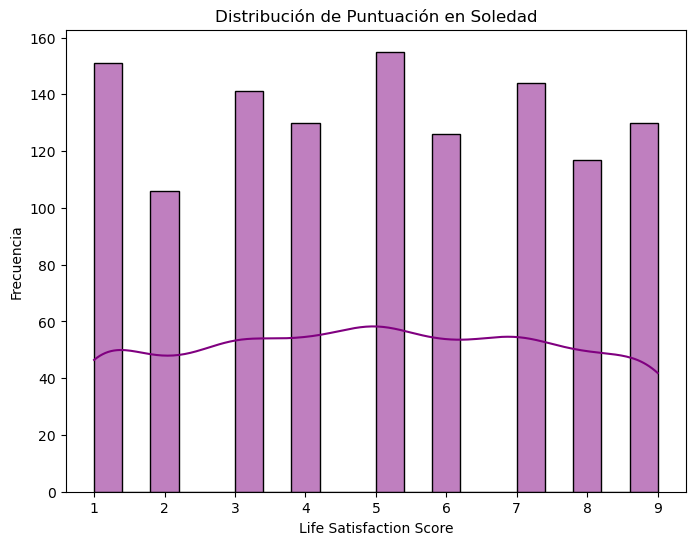

In [97]:
# Crear un histograma para la distribución de Loneliness Score

plt.figure(figsize=(8, 6))
sns.histplot(df_ans_dep['Loneliness Score'], kde=True, color='purple', bins=20)  # Agrega kde para la curva de densidad
plt.title('Distribución de Puntuación en Soledad')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('Frecuencia')
plt.show()

**Interpretacion**: las respuestas están distribuidas de manera uniforme entre los diferentes niveles de soledad, sin una concentración notable en puntuaciones bajas o altas. Sin embargo, sería útil explorar si otras variables influyen en esta distribución y si afectan la percepción de la soledad en los individuos.

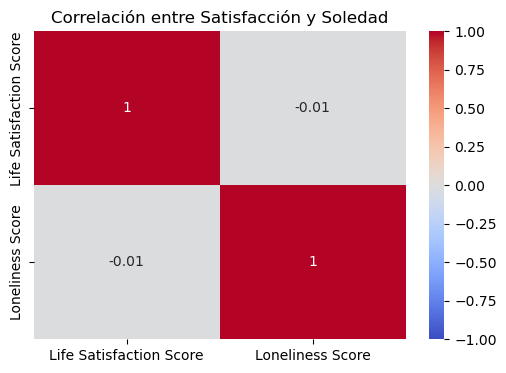

In [95]:
corr_data = df_ans_dep[['Life Satisfaction Score', 'Loneliness Score']]

# Crear un heatmap de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Correlación entre Satisfacción y Soledad')
plt.show()

**Interpretación**: la correlación entre satisfacción y soledad es de -0.01, lo que indica una relación extremadamente débil y casi nula entre ambas variables. Esto sugiere que, en esta muestra, no existe una asociación significativa entre los niveles de satisfacción y soledad, aunque sería recomendable realizar un análisis más profundo para explorar posibles factores adicionales que puedan influir en esta relación

In [99]:
# Hago copia de datos

df_ans_dep.to_csv("anxiety_depression_final.csv")